In [ ]:
import pandas as pd

In [ ]:
page = str(1)
url = "http://formds.com/locales/washington-dc?page=%s"%page

In [ ]:
def inc_cash_clean(df):
    inc_cash_list = []
    for item in df['Incremental Cash ']:
        item = item.replace("$", "")
        item = item.replace(",", "")
        inc_cash_list.append(float(item))
    df['Incremental Cash'] = inc_cash_list
    
    return(df)

In [167]:
def rep_cash_clean(df):
    rep_cash_list = []
    for item in df['Reported funding']:
        item = item.replace("$", "")
        item = item.replace(",", "")
        try:
            if float(item) < 30000000:
                rep_cash_list.append(float(item))
            else:
                rep_cash_list.append(30000001)
        except:
            rep_cash_list.append(0)
    df['Reported funding float'] = rep_cash_list
    
    return(df)

In [ ]:
def append_new_page(old_df,next_page):
    #old_df = old_df_as_list[0]
    url = "http://formds.com/locales/washington-dc?page=%s"%str(next_page)
    
    new_df_as_list = pd.read_html(url)
    new_df = new_df_as_list[0]
    
    out_df = old_df.append(new_df,ignore_index=True)
    
    return(out_df)

In [161]:
data = pd.read_html(url)
old_df = data[0]

for i in range(2,10):

    print(i)
    new_df = append_new_page(old_df,i)
    
    old_df = new_df

full_df = old_df
    
dt = full_df

2
3
4
5
6
7
8
9


In [148]:
dt = full_df

In [ ]:
dt.head()

In [ ]:
dt.describe()

In [168]:
dtt =dt.copy()
dttt = inc_cash_clean(dtt)
dttt = rep_cash_clean(dttt)

                                               Company New Filing?  \
0    HostMe Ltd Liability Co  (Other Technology - W...         Yes   
1    HP Dulles CS Investors, LLC  (Commercial - Arl...         Yes   
2    POWERUP TECHNOLOGY INC.  (Other Banking and Fi...         Yes   
3    Verte Capital, LLC  (Pooled Investment Fund - ...          No   
4    Magnolia Estates MHP, LLC  (Other Real Estate ...         Yes   
5    Shoals Financials Opportunity Fund, LP  (Poole...          No   
6    Hivers & Strivers Co-Investment Fund IB, L.P. ...         Yes   
7    1776 Bananas, LLC  (Pooled Investment Fund - W...         Yes   
8    North Bay Prosperity Fund, LP  (Pooled Investm...          No   
9     Altmore Credit I, LLC  (Commercial - Tysons, VA)         Yes   
10   BlackBoiler, LLC  (Other Technology - Arlingto...         Yes   
11   CoJax Oil & Gas Corp  (Oil and Gas - Arlington...         Yes   
12   TMG Solutions Plaza REIT 4, L.L.C.  (REITS and...         Yes   
13   TMG 2500 Wilson

In [163]:
dttt.describe()

,Incremental Cash,Reported funding float
count,2.700000e+02,2.700000e+02
mean,3.487905e+07,6.543604e+07
std,1.931624e+08,3.715103e+08
min,0.000000e+00,0.000000e+00
25%,2.750000e+03,1.250000e+05
50%,6.439500e+05,1.209437e+06
75%,5.003750e+06,1.009375e+07
max,2.643653e+09,5.541350e+09


In [164]:
dt.keys()

Index(['Company', 'New Filing?', 'Reported funding', 'Incremental Cash ',
       'Date', 'New or Amended'],
      dtype='object')

In [ ]:
dt['Date'].value_counts().hist()

In [ ]:
dates = []
for i in range(len(dttt)):
    dates.append(dttt['Date'][i])
dttt['date_str'] = dates

In [ ]:
dttt['Date'].hist()

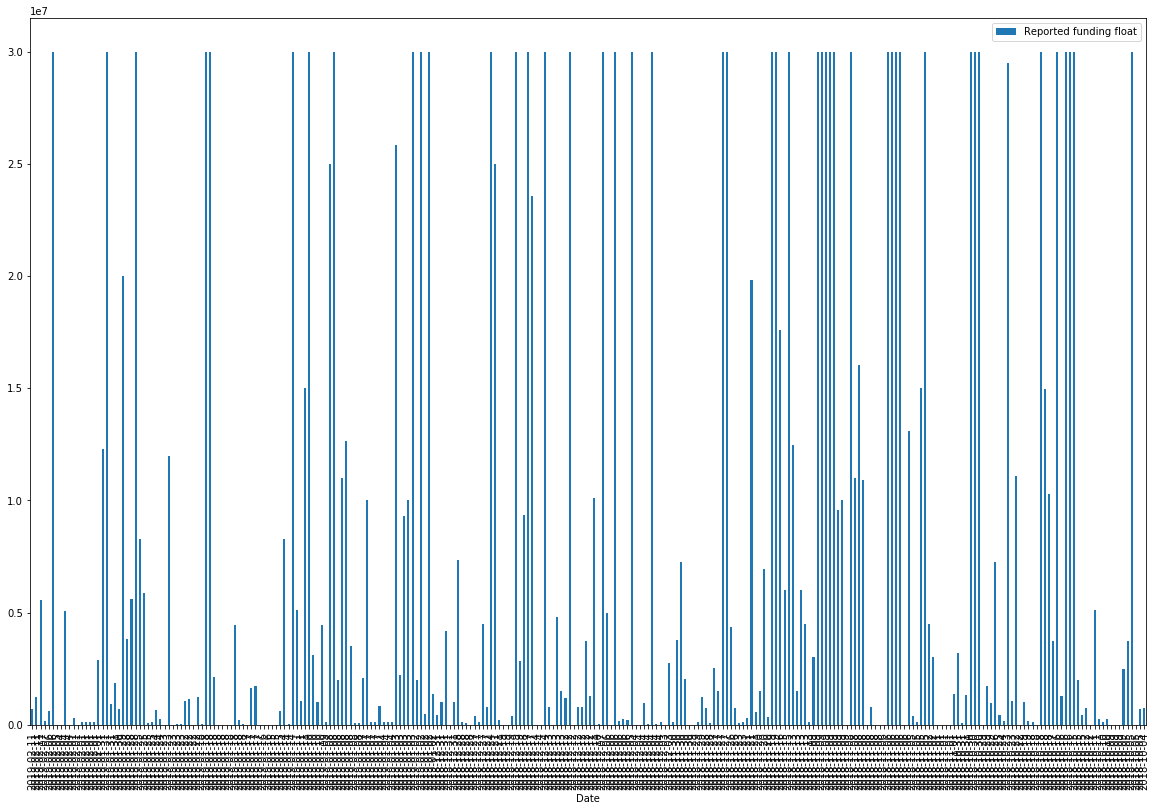

In [171]:
%matplotlib inline
dttt.plot(kind="bar",x="Date", y="Reported funding float",figsize=(20,13))

In [ ]:
1,000,000,000